## Mouse Connectivity

This notebook demonstrates how to access and manipulate data in the Allen Mouse Brain Connectivity Atlas. The `MouseConnectivityCache` AllenSDK class provides methods for downloading metadata about experiments, including their viral injection site and the mouse's transgenic line. You can request information either as a Pandas DataFrame or a simple list of dictionaries.

An important feature of the `MouseConnectivityCache` is how it stores and retrieves data for you. By default, it will create (or read) a manifest file that keeps track of where various connectivity atlas data are stored. If you request something that has not already been downloaded, it will download it and store it in a well known location.

Download this notebook in .ipynb format <a href='mouse_connectivity.ipynb'>here</a>.

In [1]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

# The manifest file is a simple JSON file that keeps track of all of
# the data that has already been downloaded onto the hard drives.
# If you supply a relative path, it is assumed to be relative to your
# current working directory.
mcc = MouseConnectivityCache(manifest_file='connectivity/mouse_connectivity_manifest.json')

# open up a list of all of the experiments
all_experiments = mcc.get_experiments(dataframe=True)
print "%d total experiments" % len(all_experiments)

# take a look at what we know about an experiment with a primary motor injection
all_experiments.loc[122642490]

2546 total experiments


gender                                                                   M
id                                                               122642490
injection-coordinates                                   [4020, 2160, 6870]
injection-structures     [{u'abbreviation': u'MOp', u'color': u'1F9D5A'...
product-id                                                               5
strain                                                            C57BL/6J
structure-abbrev                                                       MOs
structure-color                                                     1F9D5A
structure-id                                                           993
structure-name                                        Secondary motor area
transgenic-line                                             Syt6-Cre_KI148
Name: 122642490, dtype: object

`MouseConnectivityCache` has a method for retrieving the adult mouse structure tree as an `StructureTree` class instance. This is a wrapper around a list of dictionaries, where each dictionary describes a structure. It is principally useful for looking up structures by their properties.

In [2]:
# pandas for nice tables
import pandas as pd

# grab the StructureTree instance
structure_tree = mcc.get_structure_tree()

# get info on some structures
structures = structure_tree.get_structures_by_name(['Primary visual area', 'Hypothalamus'])
pd.DataFrame(structures)

,acronym,color_hex_triplet,graph_id,graph_order,id,name,structure_id_path,structure_set_ids
0,VISp,"[8, 133, 140]",1,185,385,Primary visual area,"[997, 8, 567, 688, 695, 315, 669, 385]","[396673091, 112905828, 12, 514166994, 18452763..."
1,HY,"[230, 68, 56]",1,715,1097,Hypothalamus,"[997, 8, 343, 1129, 1097]","[2, 112905828, 12, 184527634, 112905813, 11451..."


As a convenience, structures are grouped in to named collections called "structure sets". These sets can be used to quickly gather a useful subset of structures from the tree. The criteria used to define structure sets are eclectic; a structure set might list:

* structures that were used in a particular project.
* structures that coarsely partition the brain.
* structures that bear functional similarity.

or something else entirely. To view all of the available structure sets along with their descriptions, follow this [link](http://api.brain-map.org/api/v2/data/StructureSet/query.json). To see only structure sets relevant to the adult mouse brain, use the StructureTree:

In [3]:
from allensdk.api.queries.ontologies_api import OntologiesApi

oapi = OntologiesApi()

# get the ids of all the structure sets in the tree
structure_set_ids = structure_tree.get_structure_sets()

# query the API for information on those structure sets
pd.DataFrame(oapi.get_structure_sets(structure_set_ids))

,description,id,name
0,List of Primary injection structures for BDA/A...,114512892,Mouse Connectivity - BDA/AAV Primary Injection...
1,List of primary AND secondary injection struct...,112905813,Mouse Connectivity - BDA/AAV All Injection Str...
2,List of structures for ABA Fine Structure Search,10,ABA - Fine Structure Search
3,List of structures used for the Connectivity p...,167587189,Mouse Connectivity - Summary
4,List of primary AND secondary injection struct...,112905828,Mouse Connectivity - Projection All Injection ...
5,All mouse visual areas with layers,396673091,Mouse Cell Types - Structures
6,List of visual cortex structures targeted for ...,514166994,Allen Brain Observatory targeted structure set
7,List of structures for ABA Differential Search,12,ABA - Differential Search
8,List of structures representing a coarse level...,2,Mouse - Coarse
9,List of valid structures for projection target...,184527634,Mouse Connectivity - Target Search


On the connectivity atlas web site, you'll see that we show most of our data at a fairly coarse structure level. We did this by creating a structure set of ~300 structures, which we call the "summary structures". We can use the structure tree to get all of the structures in this set:

In [4]:
# From the above table, "Mouse Connectivity - Summary" has id 167587189
summary_structures = structure_tree.get_structures_by_set_id([167587189])
pd.DataFrame(summary_structures)

,acronym,color_hex_triplet,graph_id,graph_order,id,name,structure_id_path,structure_set_ids
0,TMv,"[255, 76, 62]",1,771,1,"Tuberomammillary nucleus, ventral part","[997, 8, 343, 1129, 1097, 467, 331, 557, 1]","[112905828, 184527634, 114512891, 12, 167587189]"
1,IC,"[255, 122, 255]",1,808,4,Inferior colliculus,"[997, 8, 343, 313, 339, 4]","[112905828, 10, 12, 184527634, 167587189, 1145..."
2,PSV,"[255, 174, 111]",1,873,7,Principal sensory nucleus of the trigeminal,"[997, 8, 343, 1065, 771, 1132, 7]","[112905828, 10, 12, 184527634, 112905813, 1145..."
3,IF,"[255, 166, 255]",1,861,12,Interfascicular nucleus raphe,"[997, 8, 343, 313, 348, 165, 12]","[112905828, 184527634, 12, 167587189]"
4,PT,"[255, 144, 159]",1,693,15,Parataenial nucleus,"[997, 8, 343, 1129, 549, 856, 571, 15]","[112905828, 184527634, 114512891, 12, 167587189]"
5,IG,"[126, 208, 75]",1,491,19,Induseum griseum,"[997, 8, 567, 688, 695, 1089, 1080, 19]","[12, 184527634, 3, 112905828, 167587189]"
6,AAA,"[128, 192, 226]",1,593,23,Anterior amygdalar area,"[997, 8, 567, 623, 477, 278, 23]","[12, 184527634, 114512891, 112905828, 167587189]"
7,IGL,"[255, 144, 159]",1,705,27,Intergeniculate leaflet of the lateral genicul...,"[997, 8, 343, 1129, 549, 856, 1014, 27]","[12, 184527634, 112905828, 167587189]"
8,PVa,"[255, 93, 80]",1,731,30,"Periventricular hypothalamic nucleus, anterior...","[997, 8, 343, 1129, 1097, 157, 30]","[184527634, 12, 167587189]"
9,III,"[255, 144, 255]",1,847,35,Oculomotor nucleus,"[997, 8, 343, 313, 323, 35]","[112905828, 10, 12, 184527634, 167587189, 1145..."


This is how you can filter experiments by transgenic line:

In [5]:
# fetch the experiments that have injections in the isocortex of cre-positive mice
isocortex = structure_tree.get_structures_by_name(['Isocortex'])[0]
cre_cortical_experiments = mcc.get_experiments(cre=True, 
                                                injection_structure_ids=[isocortex['id']])

print "%d cre cortical experiments" % len(cre_cortical_experiments)

# same as before, but restrict the cre line
rbp4_cortical_experiments = mcc.get_experiments(cre=[ 'Rbp4-Cre_KL100' ], 
                                                injection_structure_ids=[isocortex['id']])


print "%d Rbp4 cortical experiments" % len(rbp4_cortical_experiments)

872 cre cortical experiments
81 Rbp4 cortical experiments


## Structure Signal Unionization

The ProjectionStructureUnionizes API data tells you how much signal there was in a given structure and experiment. It contains the density of projecting signal, volume of projecting signal, and other information. `MouseConnectivityCache` provides methods for querying and storing this data.

In [6]:
# find wild-type injections into primary visual area
visp = structure_tree.get_structures_by_acronym(['VISp'])[0]
visp_experiments = mcc.get_experiments(cre=False, 
                                       injection_structure_ids=[visp['id']])

print "%d VISp experiments" % len(visp_experiments)

structure_unionizes = mcc.get_structure_unionizes([ e['id'] for e in visp_experiments ], 
                                                  is_injection=False,
                                                  structure_ids=[isocortex['id']],
                                                  include_descendants=True)

print "%d VISp non-injection, cortical structure unionizes" % len(structure_unionizes)

31 VISp experiments
27342 VISp non-injection, cortical structure unionizes


In [7]:
structure_unionizes.head()

,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
0,2,533596229,False,1.000000,9100,2230,9760,0.026798,0.124876,149.11400,1194.090,0.021440,180296424,234,6.164610e+10,140157000.0,2.089930e+10,17502200.0,0.171692
1,1,533595606,False,0.593327,7520,1330,2750,0.011947,0.017060,8.84802,518.641,0.009559,180296424,417,1.074790e+11,457384000.0,4.046940e+09,7802970.0,0.560295
2,2,533596757,False,0.579689,8680,3170,10660,0.010150,0.051445,26.56080,516.296,0.008121,180296424,959,2.291650e+10,128866000.0,3.422770e+09,6629470.0,0.157860
3,2,533596639,False,0.466185,5690,1950,6800,0.001200,0.009642,3.26359,338.489,0.000960,180296424,882,1.074910e+10,81318600.0,2.653910e+08,784045.0,0.099615
4,1,533596077,False,0.593327,7520,1330,2750,0.001450,0.008625,5.05305,585.844,0.001160,180296424,312782616,2.847250e+10,109766000.0,5.546520e+08,946757.0,0.134463


This is a rather large table, even for a relatively small number of experiments.  You can filter it down to a smaller list of structures like this.

In [8]:
dense_unionizes = structure_unionizes[ structure_unionizes.projection_density > .5 ]
large_unionizes = dense_unionizes[ dense_unionizes.volume > .5 ]
large_structures = pd.DataFrame(structure_tree.node(large_unionizes.structure_id))

print "%d large, dense, cortical, non-injection unionizes, %d structures" % ( len(large_unionizes), len(large_structures) )

print large_structures.name

large_unionizes

20 large, dense, cortical, non-injection unionizes, 20 structures
0               Lateral visual area
1                   Postrhinal area
2     Primary visual area, layer 6a
3                   Postrhinal area
4                      Visual areas
5                   Postrhinal area
6         Rostrolateral visual area
7               Primary visual area
8               Lateral visual area
9               Lateral visual area
10    Primary visual area, layer 6a
11    Primary visual area, layer 6a
12              Lateral visual area
13              Lateral visual area
14              Lateral visual area
15              Lateral visual area
16              Lateral visual area
17              Lateral visual area
18              Primary visual area
19     Primary visual area, layer 1
Name: name, dtype: object


,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
145,3,533597534,False,1.0,9710,2040,1740,0.742365,0.542703,2383.74,4392.35,0.593951,180296424,409,2.292270e+12,8.934120e+08,2.129670e+12,4.848580e+08,1.094430
395,3,533598479,False,1.0,9790,2150,1700,0.818460,0.502045,2271.53,4524.56,0.654832,180296424,312782628,2.620640e+12,1.064760e+09,2.418630e+12,5.345570e+08,1.304330
444,2,533596111,False,1.0,9560,1360,7710,0.432866,0.639240,2320.48,3630.06,0.346327,180296424,33,1.132130e+12,4.422690e+08,1.026280e+12,2.827160e+08,0.541779
552,2,533597098,False,1.0,9430,2490,9070,0.640206,0.799135,4329.41,5417.62,0.512215,180296424,312782628,2.332490e+12,5.232350e+08,2.265300e+12,4.181350e+08,0.640962
641,2,533596494,False,1.0,9130,440,7020,4.271150,0.522553,2127.72,4071.77,3.417250,180296424,669,1.265250e+13,5.338400e+09,1.135860e+13,2.789600e+09,6.539540
1229,2,537692156,False,1.0,9430,2490,9070,0.402895,0.657758,4401.33,6691.42,0.436335,309004492,312782628,2.589960e+12,5.415250e+08,2.383430e+12,3.561920e+08,0.663368
2341,2,531818691,False,1.0,7730,1380,8090,0.833069,0.625338,1947.00,3113.52,0.339757,113887162,417,9.565130e+11,4.435240e+08,8.635410e+11,2.773520e+08,0.543317
2651,2,537627526,False,1.0,8640,1270,7600,1.385690,0.506644,2105.89,4156.54,1.466700,307558646,385,5.744580e+12,2.363200e+09,4.976630e+12,1.197300e+09,2.894920
2772,2,537627539,False,1.0,8420,1790,8770,0.376781,0.591455,2456.44,4153.21,0.398808,307558646,409,1.520160e+12,5.504350e+08,1.352110e+12,3.255580e+08,0.674283
5095,2,537584637,False,1.0,8420,1810,8770,0.934323,0.669958,1803.85,2692.49,0.456440,307137980,409,1.118770e+12,5.561600e+08,1.003230e+12,3.726040e+08,0.681296


## Generating a Projection Matrix
The `MouseConnectivityCache` class provides a helper method for converting ProjectionStructureUnionize records for a set of experiments and structures into a matrix.  This code snippet demonstrates how to make a matrix of projection density values in auditory sub-structures for cre-negative VISp experiments. 

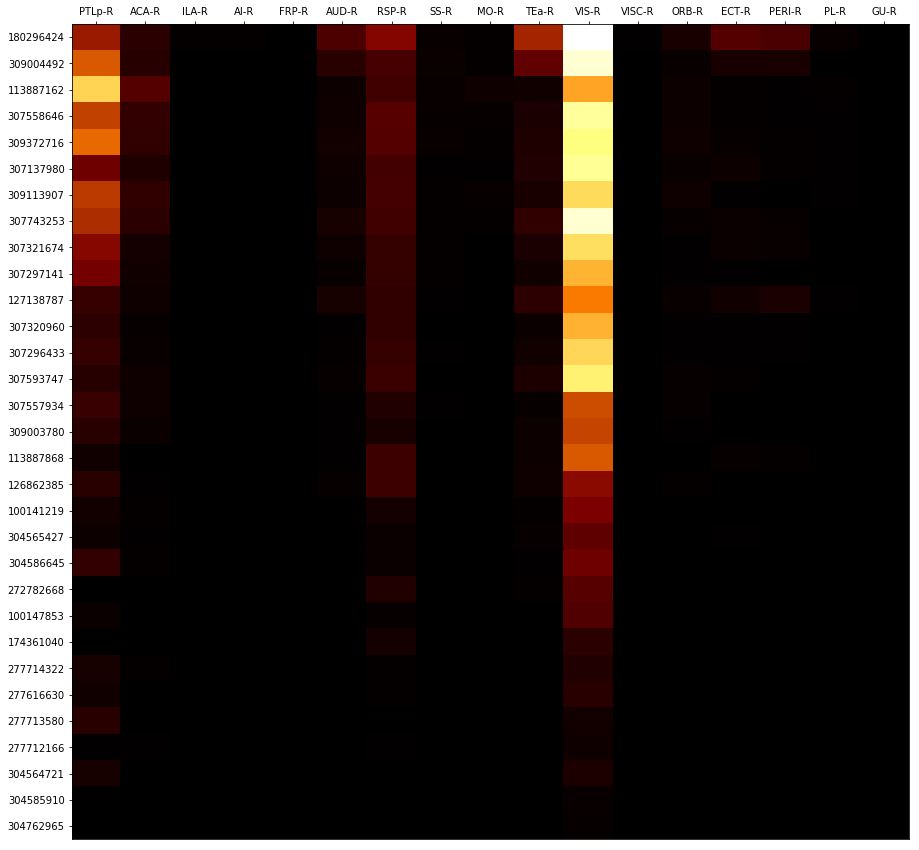

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

visp_experiment_ids = [ e['id'] for e in visp_experiments ]
ctx_children = structure_tree.child_ids( [isocortex['id']] )[0]

pm = mcc.get_projection_matrix(experiment_ids = visp_experiment_ids, 
                               projection_structure_ids = ctx_children,
                               hemisphere_ids= [2], # right hemisphere, ipsilateral
                               parameter = 'projection_density')

row_labels = pm['rows'] # these are just experiment ids
column_labels = [ c['label'] for c in pm['columns'] ] 
matrix = pm['matrix']

fig, ax = plt.subplots(figsize=(15,15))
heatmap = ax.pcolor(matrix, cmap=plt.cm.afmhot)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(matrix.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[0])+0.5, minor=False)

ax.set_xlim([0, matrix.shape[1]])
ax.set_ylim([0, matrix.shape[0]])          

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.show()

## Manipulating Grid Data

The `MouseConnectivityCache` class also helps you download and open every experiment's projection grid data volume. By default it will download 25um volumes, but uou could also download data at other resolutions if you prefer (10um, 50um, 100um).

This demonstrates how you can load the projection density for a particular experiment. It also shows how to download the template volume to which all grid data is registered. Voxels in that template have been structurally annotated by neuroanatomists and stored in a separate annotation volume image.

In [10]:
experiment_id = 181599674

# projection density: number of projecting pixels / voxel volume
pd, pd_info = mcc.get_projection_density(experiment_id)

# injection density: number of projecting pixels in injection site / voxel volume
ind, ind_info = mcc.get_injection_density(experiment_id)

# injection fraction: number of pixels in injection site / voxel volume
inf, inf_info = mcc.get_injection_fraction(experiment_id)

# data mask:
# binary mask indicating which voxels contain valid data
dm, dm_info = mcc.get_data_mask(experiment_id)

template, template_info = mcc.get_template_volume()
annot, annot_info = mcc.get_annotation_volume()

print(pd_info)
print(pd.shape, template.shape, annot.shape)

{u'space origin': ['0', '0', '0'], u'space directions': [['25', '0', '0'], ['0', '25', '0'], ['0', '0', '25']], u'sizes': [528, 320, 456], u'space': 'left-posterior-superior', u'encoding': 'gzip', u'keyvaluepairs': {}, u'endian': 'little', u'kinds': ['domain', 'domain', 'domain'], u'type': 'float', u'dimension': 3}
((528, 320, 456), (528, 320, 456), (528, 320, 456))


Once you have these loaded, you can use matplotlib see what they look like.

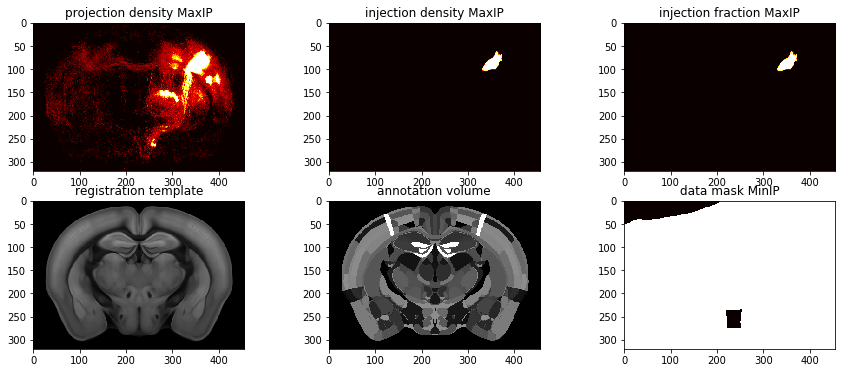

In [11]:
# compute the maximum intensity projection of the projection density
pd_mip = pd.max(axis=0)
ind_mip = ind.max(axis=0)
inf_mip = inf.max(axis=0)
dm_mip = dm.min(axis=0)

# show that slice of all volumes side-by-side
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 6))

ax1.imshow(pd_mip, cmap='hot', aspect='equal')
ax1.set_title("projection density MaxIP")

ax2.imshow(ind_mip, cmap='hot', aspect='equal')
ax2.set_title("injection density MaxIP")

ax3.imshow(inf_mip, cmap='hot', aspect='equal')
ax3.set_title("injection fraction MaxIP")

# pick a slice to show
slice_idx = 264

ax4.imshow(template[slice_idx,:,:], cmap='gray', aspect='equal', vmin=template.min(), vmax=template.max())
ax4.set_title("registration template")

ax5.imshow(annot[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=2000)
ax5.set_title("annotation volume")

ax6.imshow(dm_mip, cmap='hot', aspect='equal', vmin=0, vmax=1)
ax6.set_title('data mask MinIP')

plt.show()